In [47]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
%cd /content/drive/MyDrive/Datasets/
import pandas as pd
df = pd.read_csv('processed.cleveland.data')


/content/drive/MyDrive/Datasets


In [49]:
#These are the packages the code requires for you to install
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
#1: Age in Years
#2: Sex (0 = F, 1 = M) 
#3: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) 
#4: Resting blood pressure at admission (mmHg),
#5: Serum cholesterol (mmHg) 
#6: Fasting blood sugar > 120 mg/DL 1 = T, 0 = F
#7: Resting electrocardiographic results: 0 = normal, 1 = ST-T wave abnormality, 2 = probable/definite left ventricular hypertrophy
#8: Maximum heart rate achieved
#9: Exercise induced angina (1 = yes, 0 = no)
#10: ST depression induced by exercise relative to rest
#11: Slope of peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
#12: Number of major vessels (0-3) colored by fluoroscopy 
#13: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
#14: Diagnosis of Heart Disease (Angiographic Disease- 0: <50% diameter narrowing, 1: > 50% diameter narrowing)
df.columns = ['Age (Years)', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure (mmHg)', 'Serum Cholesterol (mmHg)', 'Fasting Blood Sugar > 120 mg/dL', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved', 'Exercise-Induced Angina', 'ST Depression Induced by Exercise Relative to Rest', 'Slope of the Peak Exercise ST Segment','Number of Major Vessels Colored by Fluoroscopy', 'Thalassemia', 'Diagnosis of Heart Disease']


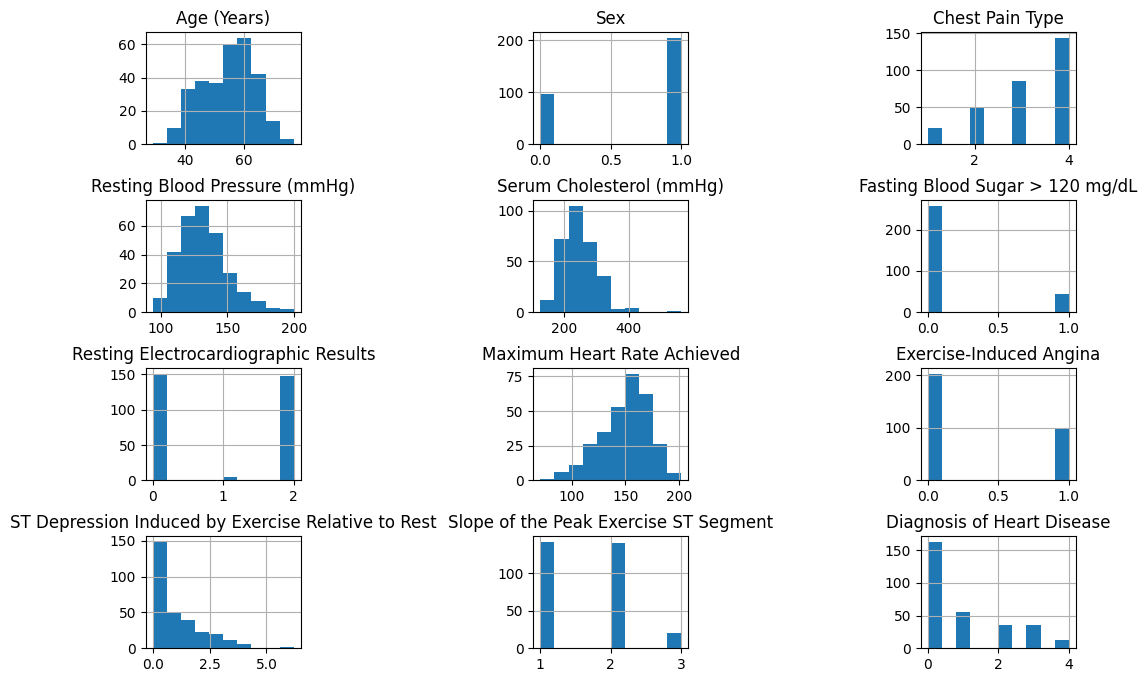

In [51]:
#Generate a histogram plot for each of the following
import pandas as pd
import matplotlib.pyplot as plt

res = df.hist(figsize=[12,8])
plt.subplots_adjust(hspace=0.5, wspace=1.5)
plt.show()

With missing values:  (303, 14)
Without missing values:  (297, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (297) is greater than the total number of samples (237). n_quantiles is set to n_samples.
  warnings.warn(


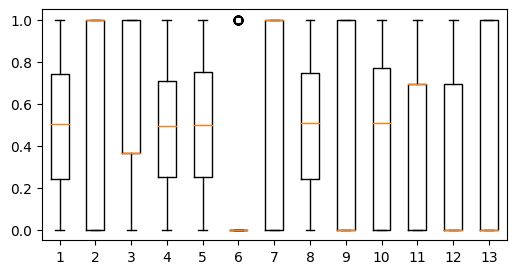

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

# Load the dataset
df = pd.read_csv('processed.cleveland.data', header=None)
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
              'MaxHR', 'ExerciseAngina', 'Oldpeak', 'STslope', 'MajorVessels', 'Thal', 'Target']

# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)

# Convert data to float
df = df.astype(float)

# Drop rows with NaN values
print("With missing values: ", df.shape)
df.dropna(inplace=True)
print("Without missing values: ", df.shape)

# Select the features and target
X = df.iloc[:, :13].values
y = df.iloc[:, 13].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = QuantileTransformer(n_quantiles=df.shape[0], output_distribution="uniform", random_state=1111)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fig = plt.figure(figsize =(6, 3))
plt.boxplot(X_train)
plt.show()

Epoch 1/1000
8/8 [==============================] - 2s 49ms/step - loss: 0.3725 - val_loss: 0.3174
Epoch 2/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.3519 - val_loss: 0.2958
Epoch 3/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.3217 - val_loss: 0.2626
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2755 - val_loss: 0.2224
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2277 - val_loss: 0.1893
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1924 - val_loss: 0.1668
Epoch 7/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.1678 - val_loss: 0.1473
Epoch 8/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.1512 - val_loss: 0.1360
Epoch 9/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.1415 - val_loss: 0.1299
Epoch 10/1000
8/8 [==============================] - 0s 23ms/step - loss: 0.1358 - val_loss: 0.1263
Epoch 11/1

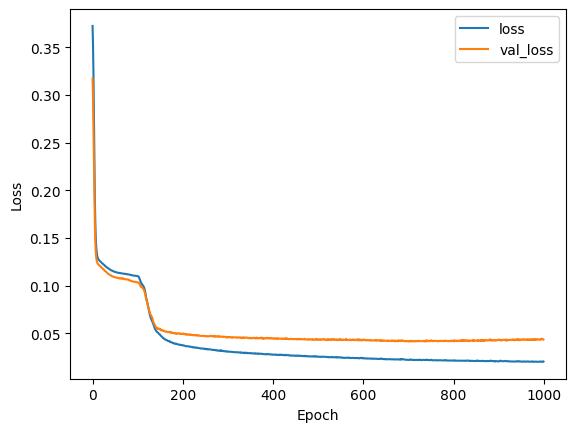

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from kerastuner.tuners import RandomSearch
# Define the input shape and the number of neurons in the latent space (d)
input_shape = X_train.shape[1:]
d = 5

# Define the encoder model
inputs = Input(shape=input_shape)
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
latent_space = Dense(d, activation='relu')(x)
encoder = Model(inputs, latent_space)

# Define the decoder model
decoder_inputs = Input(shape=(d,))
x = Dense(16, activation='relu')(decoder_inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(input_shape[0], activation='linear')(x)
decoder = Model(decoder_inputs, outputs)

# Define the autoencoder model by combining the encoder and decoder models
autoencoder_input = Input(shape=input_shape)
encoder_output = encoder(autoencoder_input)
decoder_output = decoder(encoder_output)
autoencoder = Model(autoencoder_input, decoder_output)

# Compile the autoencoder model using a suitable loss function (MSE)
autoencoder.compile(optimizer='adam', loss='mse')

# Fit the autoencoder model on the training set and validate on the test set
history = autoencoder.fit(X_train, X_train,
                          epochs=1000,
                          batch_size=32,
                          verbose=1,
                          validation_data=(X_test, X_test))
history_dict = history.history
for k,v in history_dict.items():
  plt.plot(v, label=k)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [54]:
test_loss = final_model.evaluate(X_test, X_test)


2/2 [==============================] - 0s 8ms/step - loss: 0.0512


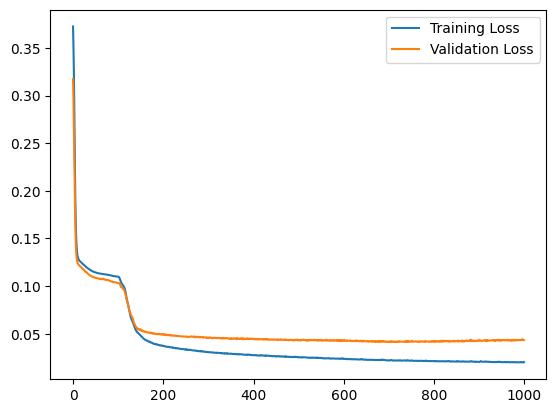

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

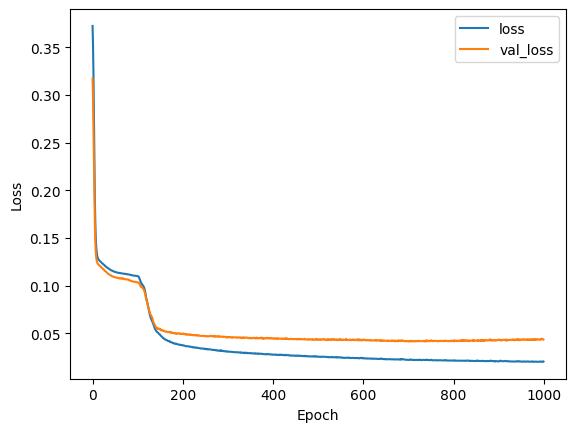

In [56]:
history_dict = history.history
for k,v in history_dict.items():
  plt.plot(v, label=k)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [57]:
# Predict the reconstructed output for each input
reconstructed_X = final_model.predict(X_test)

# Calculate the mean squared error between the original input and its reconstructed output for each feature separately
fmse = np.mean(np.square(reconstructed_X - X_test), axis=0)

2/2 [==============================] - 0s 6ms/step


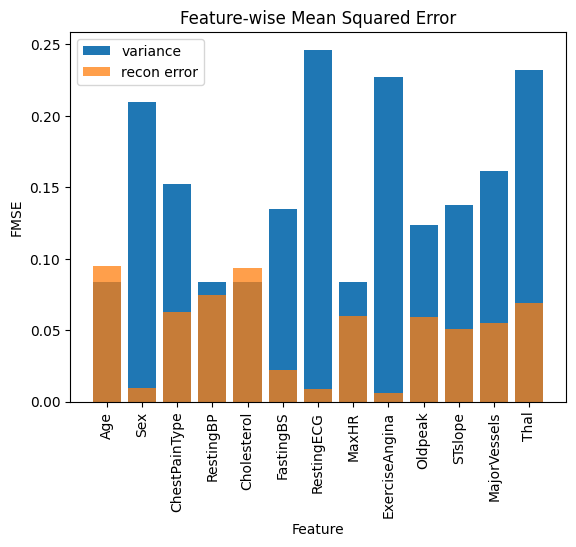

In [58]:
# Create a list of feature names
feature_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
              'MaxHR', 'ExerciseAngina', 'Oldpeak', 'STslope', 'MajorVessels', 'Thal']

# Set the x-axis tick labels
plt.xticks(range(len(feature_names)), feature_names, rotation=90)

# Create a bar plot of the FMSE values
variance = np.var(X_train, axis=0).flatten()
plt.bar(feature_names, variance, label="variance")
plt.bar(feature_names, fmse, label="recon error", alpha=0.75)
plt.title('Feature-wise Mean Squared Error')
plt.xlabel('Feature')
plt.ylabel('FMSE')
plt.legend()
plt.show()

In [59]:
# Print the shape of X_test and the length of fmse
print("Shape of X_test:", X_test.shape)
print("Length of fmse:", len(fmse))


Shape of X_test: (60, 13)
Length of fmse: 13


In [60]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the training data
reg = LinearRegression().fit(X_train, y_train)

# Get the coefficients (importances) of each feature
importances = reg.coef_

# Sort the features by importance (descending order)
sorted_idx = np.argsort(importances)[::-1]

# Print the feature importances
for i in sorted_idx:
    print(f"{feature_names[i]}: {importances[i]:.3f}")

MajorVessels: 1.009
ChestPainType: 0.682
RestingBP: 0.552
Thal: 0.451
STslope: 0.383
Sex: 0.273
Oldpeak: 0.211
RestingECG: 0.210
Cholesterol: 0.181
ExerciseAngina: 0.068
FastingBS: -0.044
Age: -0.219
MaxHR: -0.564


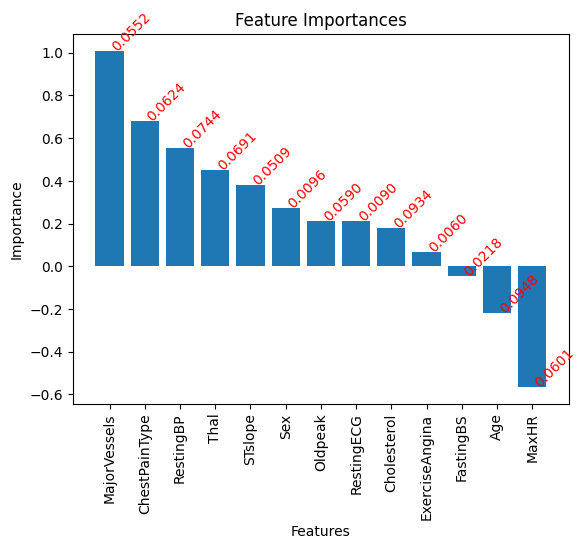

In [61]:
# Sort the feature importances by importance (descending order)
sorted_idx = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
plt.bar(range(X_train.shape[1]), importances[sorted_idx], align='center')

# Add labels for each feature
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)

# Add labels for each FMSE value
for i, v in enumerate(["{:.4f}".format(val) for val in fmse[sorted_idx]]):
  plt.text(i, importances[sorted_idx][i], str(v), color='red', fontweight='regular', rotation=45)

# Set plot title and axis labels
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")

# Show the plot
plt.show()
